# H2O Regression Example

Dataset URL: https://archive.ics.uci.edu/ml/datasets/Housing

In [66]:
%matplotlib inline
import h2o

```
DATASET COLUMNS
---------------
1. CRIM      per capita crime rate by town 
2. ZN        proportion of residential land zoned for lots over  
             25,000 sq.ft.  
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds 
             river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per $10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
             by town
13. LSTAT    % lower status of the population
14. MEDV     Median value of owner-occupied homes in $1000's
```

## Initialize H2O
local mode used in example

In [29]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_65"; Java(TM) SE Runtime Environment (build 1.8.0_65-b17); Java HotSpot(TM) 64-Bit Server VM (build 25.65-b01, mixed mode)
  Starting server from /Users/dave/.pyenv/versions/anaconda2-4.1.0/lib/python2.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/y8/53hklcgn6yz93wb9wmkbh_xh0000gp/T/tmp_f06Xn
  JVM stdout: /var/folders/y8/53hklcgn6yz93wb9wmkbh_xh0000gp/T/tmp_f06Xn/h2o_dave_started_from_python.out
  JVM stderr: /var/folders/y8/53hklcgn6yz93wb9wmkbh_xh0000gp/T/tmp_f06Xn/h2o_dave_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,03 secs
H2O cluster version:,3.10.4.2
H2O cluster version age:,1 month
H2O cluster name:,H2O_from_python_dave_c2pi8a
H2O cluster total nodes:,1
H2O cluster free memory:,3.556 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://127.0.0.1:54321
H2O connection proxy:,None


### import data to H2O cluster

In [59]:
data = h2o.import_file(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', 
    col_names=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [60]:
data.head()

CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2
0.02985,0,2.18,0,0.458,6.43,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.6,12.43,22.9
0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.9,19.15,27.1
0.21124,12.5,7.87,0,0.524,5.631,100,6.0821,5,311,15.2,386.63,29.93,16.5
0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.1,18.9


### train model

In [42]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator

In [63]:
model = H2OGradientBoostingEstimator(ntrees=100, max_depth=4, learn_rate=0.1, nfolds=5)

In [64]:
y = 'MEDV'
x = list(set(data.columns) - set(y))

In [84]:
model.train(x, y, training_frame=data, model_id='housing_gbm')

gbm Model Build progress: |███████████████████████████████████████████████| 100%


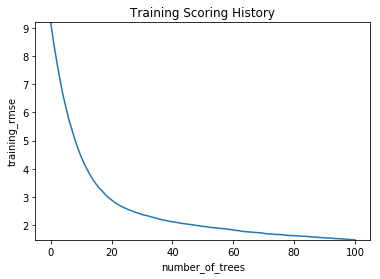

In [85]:
model.plot()

### export pojo

In [91]:
model.download_pojo(path='pojo_output', get_genmodel_jar=True)

u'/Users/dave/github/h2o_regression_example/pojo_output/housing_gbm.java'

### export mojo

In [90]:
model.download_mojo('mojo_output', get_genmodel_jar=True)

'/Users/dave/github/h2o_regression_example/mojo_output/housing_gbm.zip'